In [193]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [194]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


In [195]:
raw_df = pd.read_csv('Data/fabrizioromanoherewego.csv')

In [196]:
pd.set_option('display.max_columns', None)
raw_df['comments_full'].iloc[0]

'[{\'comment_id\': \'1391348668436380\', \'comment_url\': \'https://facebook.com/1391348668436380\', \'commenter_id\': \'100038322456761\', \'commenter_url\': \'https://facebook.com/robin.mutai.39?eav=Afbj2E2p5norD3PzN6GyTlWy0x0Jyosfcxw2EciVsrLJo-k5widXyo9Wob4548Jxt_A&fref=nf&rc=p&refid=52&__tn__=%7ER&paipv=0\', \'commenter_name\': \'Robin Mutai Ogw\', \'commenter_meta\': None, \'comment_text\': "That Garnacho\'s goal would\'ve been useful in that 7-0 lose to Liverpool it was gonna end 7-1 😹", \'comment_time\': datetime.datetime(2023, 11, 29, 23, 55), \'comment_image\': \'https://scontent.fhan2-3.fna.fbcdn.net/m1/v/t6/An_F9bJG7govfshSMBkvcRLcxT0jmiXVYKtr7lgH5AHgUrjjpZ1OD0xyxXYgf7arc0lWgCdrR_KN4Mg7RSN3Gm3W6Gg03N1tQ-ZXzVvFJ_KvvB4.png?ccb=10-5&oh=00_AfCF25qFGlutGRILWmJvlA1yzyVvkMA6kp_LVZ8vr26GOA&oe=658FA367&_nc_sid=7da55a\', \'comment_reactors\': [{\'name\': \'Naho Boss\', \'link\': \'https://facebook.com/profile.php?id=100095335218917&eav=AfZHRdvuODs9aB2XoD_r61Vh0LcLFxZqeSeBJvEspIYEkCCdK

In [197]:
num_rows_to_drop = 20

# Xác định index của dòng cuối cùng
last_row_index = raw_df.index[-1]

# Tạo list các index cần xóa
rows_to_drop = list(range(last_row_index, last_row_index - num_rows_to_drop, -1))

# Sử dụng phương thức drop để xóa các dòng
df = raw_df.drop(rows_to_drop)

# In ra DataFrame sau khi xóa
print(df)

            post_id                                               text  \
0   952134820047343  🔴⚪️ Arteta on Havertz moment: “He’s becoming b...   
1   952112546716237  ⚪️✨ Nico Páz: “This is a dream! I didn't know ...   
2   951976760063149  🔴 Ten Hag: “I am responsible for this. This is...   
3   951909296736562  ⚪️ Nico Páz after scoring his first goal for R...   
4   951897683404390               Who’s your Man of the UCL Night? 😮‍💨   
..              ...                                                ...   
95  949847613609397  🚨 The relationship between ten Hag and Rapha V...   
96  949823016945190  🚨 𝐁𝐑𝐄𝐀𝐊𝐈𝐍𝐆: Rodrigo Bentancur, out and injured...   
97  949818870278938  🇦🇷 Gio Lo Celso scores his first goal of the s...   
98  949791703614988  🇳🇱 Steven Bergwijn on Saudi clubs and West Ham...   
99  949787996948692  😡 Mauricio Pochettino, furious after Chelsea's...   

                                            post_text  shared_text  \
0   🔴⚪️ Arteta on Havertz moment: “He’s b

In [198]:
df[['post_id', 'reactions', 'comments', 'shares']].head()

,post_id,reactions,comments,shares
0,952134820047343,"{'like': 4592, 'love': 776, 'haha': 25, 'wow':...",220,15
1,952112546716237,"{'like': 21995, 'love': 6480, 'haha': 119, 'wo...",649,111
2,951976760063149,"{'like': 25947, 'love': 689, 'haha': 8586, 'wo...",5200,295
3,951909296736562,"{'like': 71563, 'love': 21626, 'haha': 154, 'w...",1200,718
4,951897683404390,"{'like': 49187, 'love': 9093, 'haha': 83, 'wow...",3400,1000


In [199]:
df['reactions'] = df['reactions'].apply(lambda x: eval(x) if isinstance(x, str) else x)
df_reactions = df['reactions'].apply(pd.Series)
df_reactions = df_reactions.drop(df_reactions.columns[-1], axis=1)
df_reactions['reaction_count'] = df['reaction_count']
df_reactions['comments'] = df['comments']
df_reactions['shares'] = df['shares']

df_reactions.head()


,like,love,haha,wow,care,angry,sad,reaction_count,comments,shares
0,4592.0,776.0,25.0,8.0,57.0,NaN,NaN,5458,220,15
1,21995.0,6480.0,119.0,15.0,500.0,1.0,NaN,29110,649,111
2,25947.0,689.0,8586.0,57.0,92.0,272.0,151.0,35794,5200,295
3,71563.0,21626.0,154.0,57.0,1646.0,7.0,2.0,95055,1200,718
4,49187.0,9093.0,83.0,61.0,649.0,17.0,22.0,59112,3400,1000


In [200]:

for i in range (df_reactions.shape[0]):
    if pd.isna(df_reactions['like'].iloc[i]):
        df_reactions['like'].iloc[i] = df_reactions['reaction_count'].iloc[i] * 0.75
    if pd.isna(df_reactions['love'].iloc[i]):
        df_reactions['love'].iloc[i] = df_reactions['reaction_count'].iloc[i] * 0.15
    
df_reactions['haha'].fillna(df_reactions['haha'].median(), inplace=True)
df_reactions['wow'].fillna(df_reactions['wow'].median(), inplace=True)
df_reactions['care'].fillna(df_reactions['care'].median(), inplace=True)
df_reactions['angry'].fillna(df_reactions['angry'].median(), inplace=True)
df_reactions['sad'].fillna(df_reactions['sad'].median(), inplace=True)
df_reactions

C:\Users\Laptop VINHLINK\AppData\Local\Temp\ipykernel_11416\3596362655.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reactions['like'].iloc[i] = df_reactions['reaction_count'].iloc[i] * 0.75
C:\Users\Laptop VINHLINK\AppData\Local\Temp\ipykernel_11416\3596362655.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reactions['love'].iloc[i] = df_reactions['reaction_count'].iloc[i] * 0.15
C:\Users\Laptop VINHLINK\AppData\Local\Temp\ipykernel_11416\3596362655.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pyda

,like,love,haha,wow,care,angry,sad,reaction_count,comments,shares
0,4592.0,776.0,25.0,8.0,57.0,6.0,8.0,5458,220,15
1,21995.0,6480.0,119.0,15.0,500.0,1.0,8.0,29110,649,111
2,25947.0,689.0,8586.0,57.0,92.0,272.0,151.0,35794,5200,295
3,71563.0,21626.0,154.0,57.0,1646.0,7.0,2.0,95055,1200,718
4,49187.0,9093.0,83.0,61.0,649.0,17.0,22.0,59112,3400,1000
...,...,...,...,...,...,...,...,...,...,...
95,77250.0,15450.0,119.0,37.0,234.0,6.0,8.0,103000,7300,1200
96,33000.0,6600.0,119.0,37.0,234.0,6.0,8.0,44000,843,174
97,20250.0,4050.0,119.0,37.0,234.0,6.0,8.0,27000,268,54
98,15000.0,3000.0,119.0,37.0,234.0,6.0,8.0,20000,155,27


In [201]:
df_interactions = df_reactions
df_interactions

,like,love,haha,wow,care,angry,sad,reaction_count,comments,shares
0,4592.0,776.0,25.0,8.0,57.0,6.0,8.0,5458,220,15
1,21995.0,6480.0,119.0,15.0,500.0,1.0,8.0,29110,649,111
2,25947.0,689.0,8586.0,57.0,92.0,272.0,151.0,35794,5200,295
3,71563.0,21626.0,154.0,57.0,1646.0,7.0,2.0,95055,1200,718
4,49187.0,9093.0,83.0,61.0,649.0,17.0,22.0,59112,3400,1000
...,...,...,...,...,...,...,...,...,...,...
95,77250.0,15450.0,119.0,37.0,234.0,6.0,8.0,103000,7300,1200
96,33000.0,6600.0,119.0,37.0,234.0,6.0,8.0,44000,843,174
97,20250.0,4050.0,119.0,37.0,234.0,6.0,8.0,27000,268,54
98,15000.0,3000.0,119.0,37.0,234.0,6.0,8.0,20000,155,27


In [202]:
df_interactions.describe().T

,count,mean,std,min,25%,50%,75%,max
like,100.0,49651.84,48604.864950,4592.0,24750.00,32281.5,52779.00,363000.0
love,100.0,8861.45,12285.994972,360.0,2273.00,4134.5,9107.50,72600.0
haha,100.0,707.31,1859.180447,10.0,71.25,119.0,247.25,12026.0
wow,100.0,68.67,94.533309,8.0,30.75,37.0,55.50,662.0
care,100.0,447.27,725.169501,43.0,178.75,234.0,395.00,5684.0
angry,100.0,24.08,64.517272,1.0,4.00,6.0,9.00,370.0
sad,100.0,431.81,2242.434899,1.0,5.00,8.0,20.00,18749.0
reaction_count,100.0,62493.71,65488.648184,5458.0,29221.00,39501.5,64632.50,484000.0
comments,100.0,1600.16,2308.425441,47.0,425.50,696.0,1700.00,16000.0
shares,100.0,540.71,1963.638569,11.0,58.75,112.5,334.75,19000.0


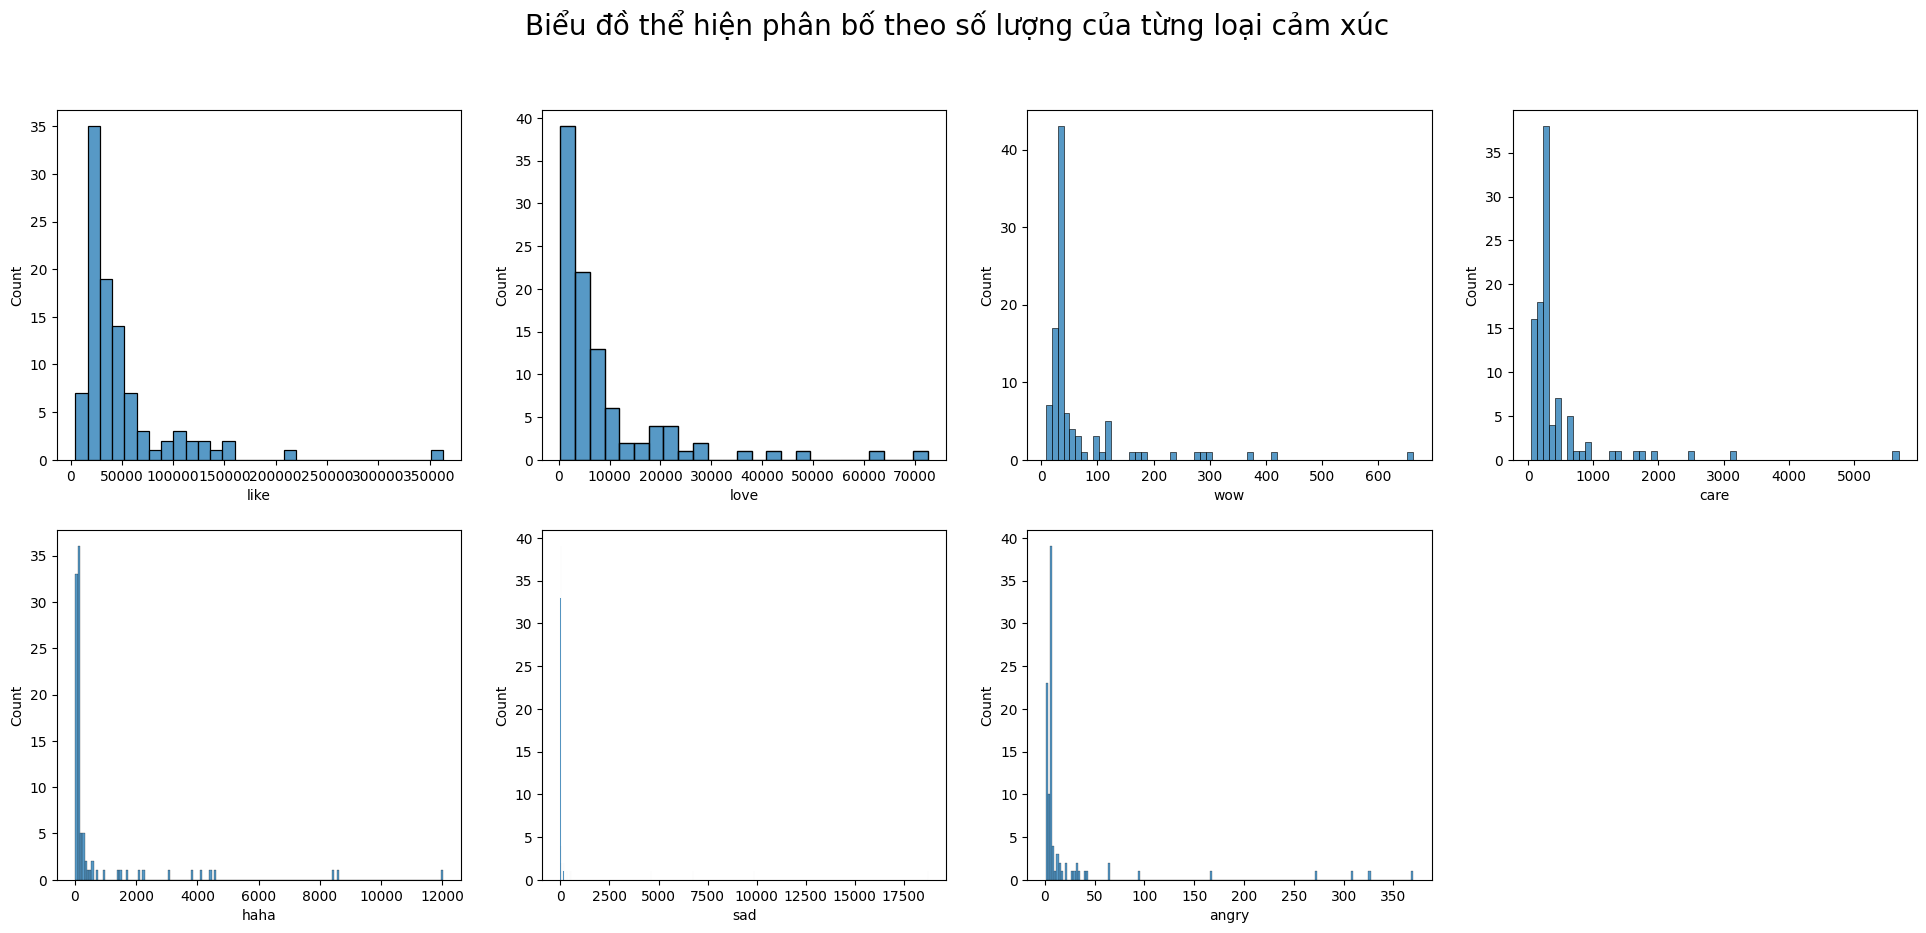

In [203]:
fig, axs = plt.subplots(2, 4, figsize=(24, 10))

sns.histplot(df_interactions['like'], ax=axs[0, 0], label='like')
sns.histplot(df_interactions['love'], ax=axs[0, 1], label='love')
sns.histplot(df_interactions['wow'], ax=axs[0, 2], label='wow')
sns.histplot(df_interactions['haha'], ax=axs[1, 0], label='haha')
sns.histplot(df_interactions['care'], ax=axs[0, 3], label='care')
sns.histplot(df_interactions['angry'], ax=axs[1, 2], label='angry')
sns.histplot(df_interactions['sad'], ax=axs[1, 1], label='sad')
axs[1, 3].set_visible(False)

plt.suptitle('Biểu đồ thể hiện phân bố theo số lượng của từng loại cảm xúc', fontsize=20)
plt.show()

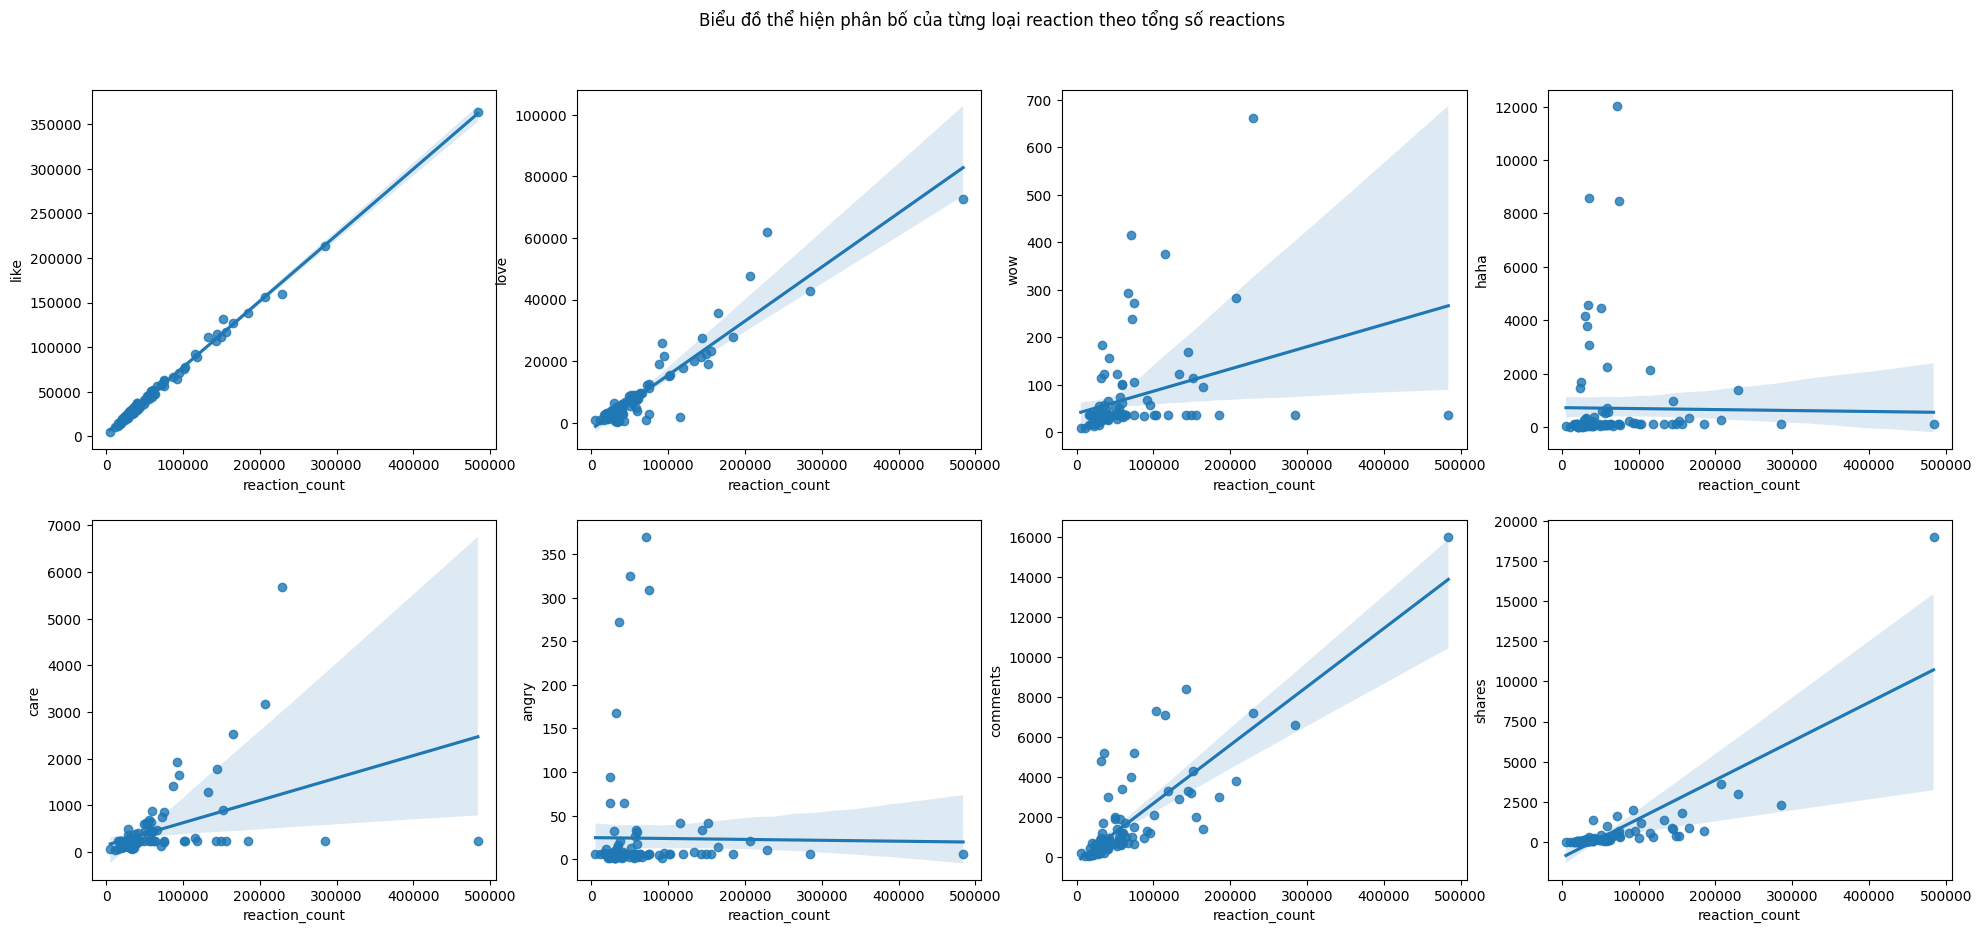

In [204]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(24, 10))

sns.regplot(data=df_interactions, x="reaction_count", y="like", ax=axes[0, 0])
sns.regplot(data=df_interactions, x="reaction_count", y="love", ax=axes[0, 1])
sns.regplot(data=df_interactions, x="reaction_count", y="wow", ax=axes[0, 2])
sns.regplot(data=df_interactions, x="reaction_count", y="haha", ax=axes[0, 3])
sns.regplot(data=df_interactions, x="reaction_count", y="care", ax=axes[1, 0])
sns.regplot(data=df_interactions, x="reaction_count", y="angry", ax=axes[1, 1])
sns.regplot(data=df_interactions, x="reaction_count", y="comments", ax=axes[1, 2])
sns.regplot(data=df_interactions, x="reaction_count", y="shares", ax=axes[1, 3])

plt.suptitle("Biểu đồ thể hiện phân bố của từng loại reaction theo tổng số reactions")
plt.subplots_adjust(top=0.9)
plt.show()

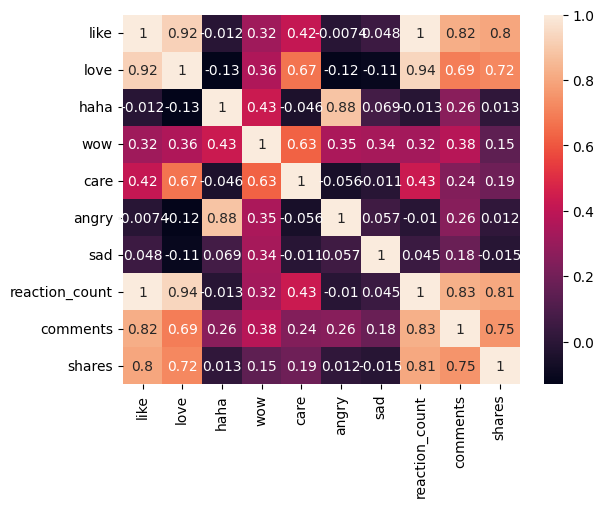

In [205]:
sns.heatmap(df_interactions.corr(),annot=True)
plt.show()

Simple Linear Regression model predicting Reactions Count based on Number of Shares and Comments

Feauture Scaling

In [208]:
from sklearn.preprocessing import Normalizer
 
scaler = Normalizer()
scaled_data = scaler.fit_transform(df_interactions)
scaled_df = pd.DataFrame(scaled_data,
                         columns=df_interactions.columns)
scaled_df.head()

,like,love,haha,wow,care,angry,sad,reaction_count,comments,shares
0,0.639687,0.108100,0.003483,0.001114,0.007940,0.000836,0.001114,0.760324,0.030647,0.002090
1,0.593407,0.174825,0.003211,0.000405,0.013490,0.000027,0.000216,0.785364,0.017509,0.002995
2,0.572252,0.015196,0.189361,0.001257,0.002029,0.005999,0.003330,0.789425,0.114684,0.006506
3,0.591670,0.178800,0.001273,0.000471,0.013609,0.000058,0.000017,0.785898,0.009921,0.005936
4,0.634512,0.117300,0.001071,0.000787,0.008372,0.000219,0.000284,0.762544,0.043860,0.012900


In [210]:
feature = ['reaction_count', 'like', 'love', 'haha', 'wow', 'sad', 'angry', 'care']
X = scaled_df[feature].values
y = scaled_df['comments'].values

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(80, 8)
(20, 8)
(80,)
(20,)


In [ ]:
class LinearRegression:
    def __init__(self, learning_rate=0.02, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Gradient Descent
        for i in range(self.num_iterations):
            # Predicted values
            y_pred = np.dot(X, self.weights) + self.bias

            # Compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / n_samples) * np.sum(y_pred - y)

            # Update parameters
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

            print("Error ", i, ": " , np.sum(y_pred - y) / n_samples)

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias       

In [ ]:
model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

y_pred

Error  0 :  -0.09636275308719364
Error  1 :  -0.09411559333861527
Error  2 :  -0.09191705323288307
Error  3 :  -0.08976608630365022
Error  4 :  -0.08766166859946214
Error  5 :  -0.08560279819935894
Error  6 :  -0.08358849473889982
Error  7 :  -0.08161779894638459
Error  8 :  -0.07968977218905311
Error  9 :  -0.07780349602904821
Error  10 :  -0.07595807178893162
Error  11 :  -0.07415262012654772
Error  12 :  -0.07238628061903399
Error  13 :  -0.07065821135578085
Error  14 :  -0.06896758854014935
Error  15 :  -0.06731360609975716
Error  16 :  -0.06569547530514938
Error  17 :  -0.06411242439667333
Error  18 :  -0.06256369821938094
Error  19 :  -0.06104855786578609
Error  20 :  -0.059566280326307765
Error  21 :  -0.058116158147233754
Error  22 :  -0.05669749909604317
Error  23 :  -0.05530962583392927
Error  24 :  -0.05395187559536783
Error  25 :  -0.052623599874579464
Error  26 :  -0.051324164118737504
Error  27 :  -0.05005294742777636
Error  28 :  -0.04880934226065841
Error  29 :  -0.0475

array([0.05642344, 0.02855328, 0.05814008, 0.19648603, 0.04465721,
       0.14965744, 0.07671551, 0.03771002, 0.0533357 , 0.03012622,
       0.102884  , 0.04682565, 0.03232784, 0.05101319, 0.13470985,
       0.15445261, 0.04216569, 0.07859575, 0.08433542, 0.11317637])

In [ ]:
print("Mean Squared Error: " + str(mean_squared_error(y_test, y_pred)))
print("Mean Absolute Error: " + str(mean_absolute_error(y_test, y_pred)))

Mean Squared Error: 0.011001098104941005
Mean Absolute Error: 0.06329019475716754


Share Denpending on interactions

In [ ]:
z = scaled_df['shares'].values
X_train, X_test, z_train, z_test = train_test_split(X, z, test_size=0.2, random_state=10)

my_model = LinearRegression()

my_model.fit(X_train, z_train)

Error  0 :  -0.03133327189425457
Error  1 :  -0.030544273671651044
Error  2 :  -0.029772437845233757
Error  3 :  -0.029017394868225056
Error  4 :  -0.02827878314495439
Error  5 :  -0.0275562488597935
Error  6 :  -0.026849445809772072
Error  7 :  -0.026158035240794558
Error  8 :  -0.02548168568738072
Error  9 :  -0.024820072815854004
Error  10 :  -0.024172879270903752
Error  11 :  -0.023539794525448444
Error  12 :  -0.022920514733729108
Error  13 :  -0.022314742587563365
Error  14 :  -0.021722187175692013
Error  15 :  -0.021142563846151825
Error  16 :  -0.020575594071609204
Error  17 :  -0.020021005317591187
Error  18 :  -0.01947853091355136
Error  19 :  -0.01894790992670976
Error  20 :  -0.018428887038606984
Error  21 :  -0.017921212424314242
Error  22 :  -0.017424641634242108
Error  23 :  -0.016938935478492092
Error  24 :  -0.016463859913696356
Error  25 :  -0.015999185932291958
Error  26 :  -0.01554468945417741
Error  27 :  -0.015100151220700056
Error  28 :  -0.014665356690924378
Err

In [ ]:
z_pred = my_model.predict(X_test)

print("Mean Squared Error: " + str(mean_squared_error(z_test, z_pred)))
print("Mean Absolute Error: " + str(mean_absolute_error(z_test, z_pred)))

Mean Squared Error: 0.0006766678590219002
Mean Absolute Error: 0.016655748677462126


K-means Clustering

In [ ]:
raw_df['time'] = pd.to_datetime(raw_df['time'])
from datetime import timedelta
shift = timedelta(hours=6)
raw_df['time'] = raw_df['time'] - shift
raw_df['time']


0     2023-11-30 09:30:55
1     2023-11-30 08:30:21
2     2023-11-30 02:23:21
3     2023-11-29 23:27:09
4     2023-11-29 23:00:00
              ...        
115   2023-11-25 18:05:35
116   2023-11-25 17:28:44
117   2023-11-25 17:24:41
118   2023-11-25 17:15:28
119   2023-11-25 16:43:00
Name: time, Length: 120, dtype: datetime64[ns]

In [ ]:
df_interactions['post_hour'] = raw_df['time'].dt.hour
df_interactions

,like,love,haha,wow,care,angry,sad,reactions_count,comments,shares,post_hour
0,4592.0,776.0,25.0,8.0,57.0,6.0,8.0,5458,220,15,9
1,21995.0,6480.0,119.0,15.0,500.0,1.0,8.0,29110,649,111,8
2,25947.0,689.0,8586.0,57.0,92.0,272.0,151.0,35794,5200,295,2
3,71563.0,21626.0,154.0,57.0,1646.0,7.0,2.0,95055,1200,718,23
4,49187.0,9093.0,83.0,61.0,649.0,17.0,22.0,59112,3400,1000,23
...,...,...,...,...,...,...,...,...,...,...,...
95,77250.0,15450.0,119.0,37.0,234.0,6.0,8.0,103000,7300,1200,16
96,33000.0,6600.0,119.0,37.0,234.0,6.0,8.0,44000,843,174,15
97,20250.0,4050.0,119.0,37.0,234.0,6.0,8.0,27000,268,54,15
98,15000.0,3000.0,119.0,37.0,234.0,6.0,8.0,20000,155,27,14


In [ ]:
for i in range(100): 
    if df_interactions['post_hour'].iloc[i] < 4 or df_interactions['post_hour'].iloc[i] > 22:
        df_interactions['post_hour'].iloc[i] = 'night'
    elif df_interactions['post_hour'].iloc[i] >= 4 and df_interactions['post_hour'].iloc[i] <= 12:
        df_interactions['post_hour'].iloc[i] = 'morning'
    elif df_interactions['post_hour'].iloc[i] >= 11 and df_interactions['post_hour'].iloc[i] < 14:
        df_interactions['post_hour'].iloc[i] = 'noon'
    elif df_interactions['post_hour'].iloc[i] >= 14 and df_interactions['post_hour'].iloc[i] < 18:
        df_interactions['post_hour'].iloc[i] = 'afternoon'
    else:
        df_interactions['post_hour'].iloc[i] = 'evening'

C:\Users\Laptop VINHLINK\AppData\Local\Temp\ipykernel_11416\177593540.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_interactions['post_hour'].iloc[i] = 'morning'
C:\Users\Laptop VINHLINK\AppData\Local\Temp\ipykernel_11416\177593540.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'morning' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  df_interactions['post_hour'].iloc[i] = 'morning'


In [ ]:
data = df_interactions
target = df_interactions['post_hour']

In [ ]:
data

,like,love,haha,wow,care,angry,sad,reactions_count,comments,shares,post_hour
0,4592.0,776.0,25.0,8.0,57.0,6.0,8.0,5458,220,15,morning
1,21995.0,6480.0,119.0,15.0,500.0,1.0,8.0,29110,649,111,morning
2,25947.0,689.0,8586.0,57.0,92.0,272.0,151.0,35794,5200,295,night
3,71563.0,21626.0,154.0,57.0,1646.0,7.0,2.0,95055,1200,718,night
4,49187.0,9093.0,83.0,61.0,649.0,17.0,22.0,59112,3400,1000,night
...,...,...,...,...,...,...,...,...,...,...,...
95,77250.0,15450.0,119.0,37.0,234.0,6.0,8.0,103000,7300,1200,afternoon
96,33000.0,6600.0,119.0,37.0,234.0,6.0,8.0,44000,843,174,afternoon
97,20250.0,4050.0,119.0,37.0,234.0,6.0,8.0,27000,268,54,afternoon
98,15000.0,3000.0,119.0,37.0,234.0,6.0,8.0,20000,155,27,afternoon


Convert categorical variable into integers

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['post_hour'] = le.fit_transform(data['post_hour'])
target = le.transform(target)

In [ ]:
data

,like,love,haha,wow,care,angry,sad,reactions_count,comments,shares,post_hour
0,4592.0,776.0,25.0,8.0,57.0,6.0,8.0,5458,220,15,2
1,21995.0,6480.0,119.0,15.0,500.0,1.0,8.0,29110,649,111,2
2,25947.0,689.0,8586.0,57.0,92.0,272.0,151.0,35794,5200,295,3
3,71563.0,21626.0,154.0,57.0,1646.0,7.0,2.0,95055,1200,718,3
4,49187.0,9093.0,83.0,61.0,649.0,17.0,22.0,59112,3400,1000,3
...,...,...,...,...,...,...,...,...,...,...,...
95,77250.0,15450.0,119.0,37.0,234.0,6.0,8.0,103000,7300,1200,0
96,33000.0,6600.0,119.0,37.0,234.0,6.0,8.0,44000,843,174,0
97,20250.0,4050.0,119.0,37.0,234.0,6.0,8.0,27000,268,54,0
98,15000.0,3000.0,119.0,37.0,234.0,6.0,8.0,20000,155,27,0


Feature Scaling

In [211]:
from sklearn.preprocessing import MinMaxScaler
 
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_interactions)
scaled_df_interactions = pd.DataFrame(scaled_data,
                         columns=df_interactions.columns)
scaled_df_interactions.head()

,like,love,haha,wow,care,angry,sad,reaction_count,comments,shares
0,0.000000,0.005759,0.001248,0.000000,0.002482,0.013550,0.000373,0.000000,0.010844,0.000211
1,0.048556,0.084718,0.009071,0.010703,0.081014,0.000000,0.000373,0.049425,0.037736,0.005266
2,0.059583,0.004554,0.713715,0.074924,0.008686,0.734417,0.008001,0.063393,0.323011,0.014956
3,0.186857,0.294380,0.011984,0.074924,0.284169,0.016260,0.000053,0.187229,0.072275,0.037232
4,0.124425,0.120889,0.006075,0.081040,0.107428,0.043360,0.001120,0.112120,0.210180,0.052083


In [ ]:
from sklearn.cluster import KMeans

kmeans_model = KMeans(n_clusters=4,random_state=0) 

kmeans_model.fit(data)

labels = kmeans.labels_


correct_labels = sum(target == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, target.size))

print('Accuracy score: {0:0.2f}'. format(correct_labels/float(target.size)))

Result: 75 out of 100 samples were correctly labeled.
Accuracy score: 0.75


c:\Users\Laptop VINHLINK\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
